In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

plt.style.use("ggplot")


In [6]:
apps = pd.read_csv("apps.csv")
reviews = pd.read_csv("user_reviews.csv")


In [7]:
apps.head()
apps.info()
reviews.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 679.2+ KB


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


**Data Preparation (Cleaning)**

**5.1 Remove duplicate apps**

In [9]:
apps = apps.drop_duplicates(subset='App', keep='first')


**5.2 Fix incorrect data types**
    
Convert Reviews to numeric

In [11]:
apps['Reviews'] = pd.to_numeric(apps['Reviews'], errors='coerce')


Fix Installs

In [12]:
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True)
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')


Fix Price

In [13]:
apps['Price'] = apps['Price'].str.replace('$', '', regex=False)
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')


**Handle missing values**

In [16]:
apps = apps.dropna(subset=['Rating'])


**Category Exploration**

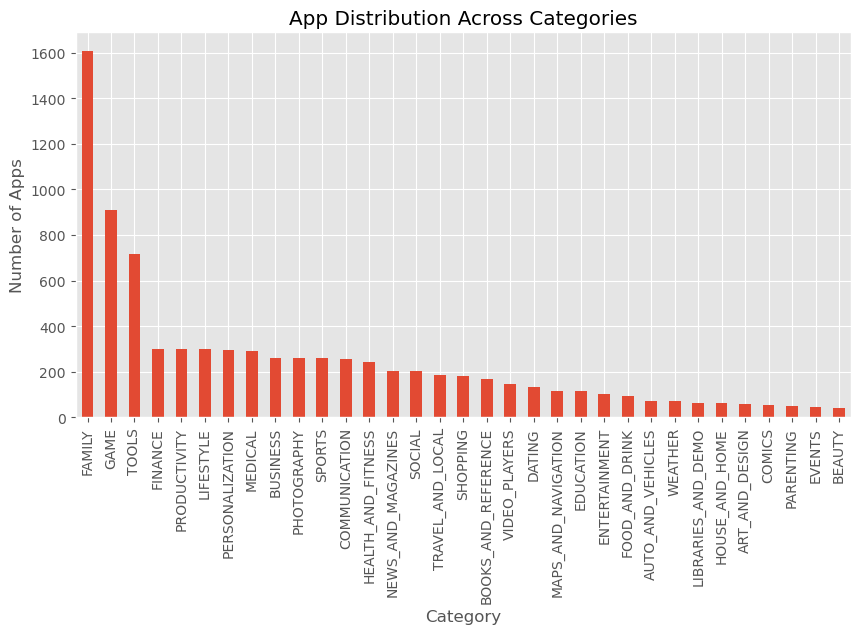

In [17]:
plt.figure(figsize=(10,5))
apps['Category'].value_counts().plot(kind='bar')
plt.title("App Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()


**Metrics Analysis**

7.1 Ratings distribution

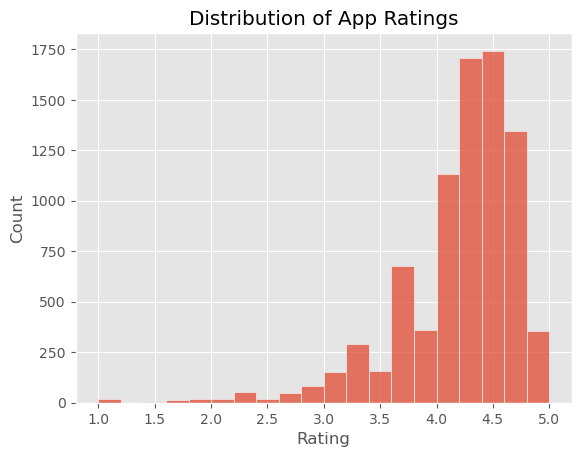

In [18]:
sns.histplot(apps['Rating'], bins=20)
plt.title("Distribution of App Ratings")
plt.show()


7.2 Free vs Paid apps

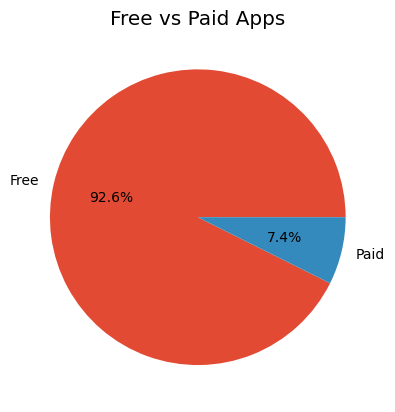

In [19]:
apps['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Free vs Paid Apps")
plt.ylabel("")
plt.show()


Popularity vs Rating

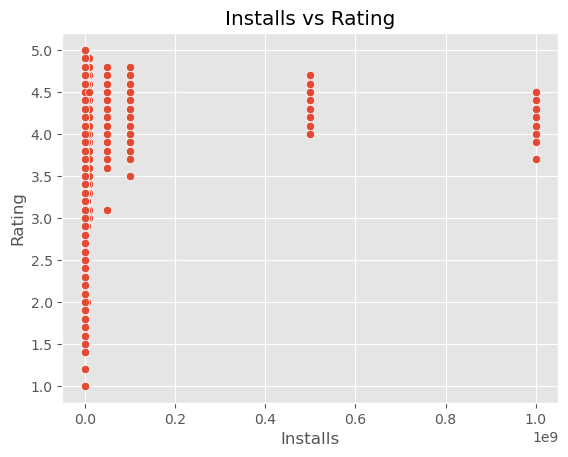

In [21]:
sns.scatterplot(x='Installs', y='Rating', data=apps)
plt.title("Installs vs Rating")
plt.show()


**Sentiment Analysis (User Reviews)**

Clean review data

In [22]:
reviews = reviews.dropna(subset=['Sentiment'])


**Sentiment distribution**

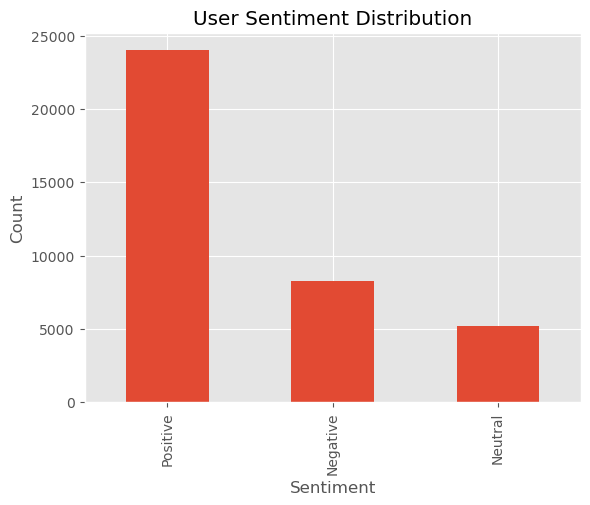

In [23]:
reviews['Sentiment'].value_counts().plot(kind='bar')
plt.title("User Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
